In [ ]:
%load_ext autoreload
%autoreload 2

import TRITON_SWMM_toolkit.examples as examples
import TRITON_SWMM_toolkit.experiment as exp
from importlib import reload
reload(examples)
reload(exp)
norfolk_irene = examples.retrieve_norfolk_testcase(download_if_exists=False)

norfolk_irene.system.experiment.sim_run_status(0)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'simulation completed'

In [6]:
# working on run methods
run = norfolk_irene.system.experiment._sim_run_objects[0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


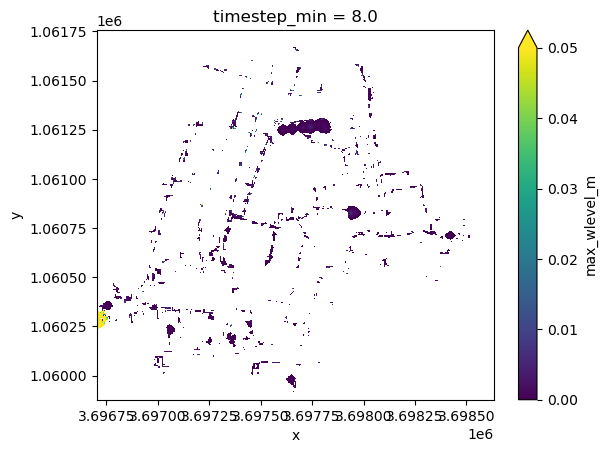

In [176]:
%load_ext autoreload
%autoreload 2
import TRITON_SWMM_toolkit.post_processing as pst
reload(pst)
import xarray as xr

dir_outputs = run._triton_swmm_raw_output_directory()
out_type = norfolk_irene.system.experiment.cfg_exp.TRITON_output_type
complevel=5
reporting_interval_s = norfolk_irene.system.experiment.cfg_exp.TRITON_reporting_timestep_s


rds_dem = norfolk_irene.system.open_processed_dem_as_rds()
f_out = pst.export_TRITON_outputs(dir_outputs, out_type, reporting_interval_s, rds_dem, complevel)
ds_results = xr.open_dataset(f_out, engine = "zarr", consolidated = False)

da_max_wlevel = ds_results["max_wlevel_m"].sel(timestep_min = ds_results.timestep_min.max())

da_max_wlevel.where(da_max_wlevel>0).plot(x="x",y="y", vmax = 0.05)


In [170]:
ds_results

<xarray.Dataset> Size: 38MB
Dimensions:         (timestep_min: 4, x: 551, y: 537)
Coordinates:
  * timestep_min    (timestep_min) float64 32B 2.0 4.0 6.0 8.0
  * x               (x) float64 4kB 3.697e+06 3.697e+06 ... 3.699e+06 3.699e+06
  * y               (y) float64 4kB 1.06e+06 1.06e+06 ... 1.062e+06 1.062e+06
Data variables:
    velocity_x_mps  (timestep_min, x, y) float64 9MB ...
    max_wlevel_m    (timestep_min, x, y) float64 9MB ...
    velocity_y_mps  (timestep_min, x, y) float64 9MB ...
    wlevel_m        (timestep_min, x, y) float64 9MB ...